In [1]:
# Procesamiento de datos de entrada y diseño de un bosque aleatorio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


In [2]:
def dividirDB (array, tasaEntrenamiento):
    indiceEntrenamiento = round(array.shape[0]*tasaEntrenamiento)
    matrizEntrenamiento = array[0:indiceEntrenamiento,:]
    matrizValidacion = array[(indiceEntrenamiento):len(array),:]
    return matrizEntrenamiento, matrizValidacion

In [3]:
#Onehot
def EncoderOneHot (Y):
    values = np.array(Y)
    label_encoder = preprocessing.LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # binary encode
    onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    Y_o = onehot_encoder.fit_transform(integer_encoded)
    #print(Y_o)
    return Y_o

In [4]:
#Función para randomizar cada clase
def mezclar(array_original):
    array = np.empty_like(array_original)
    n = len(array_original)
    alea = list(range(n))
    random.shuffle(alea)
    for i in range(n):
        array[i] = array_original[alea[i]]
    return array

In [5]:
#Importamos los datos desde la base de datos.
dataOriginal = pd.read_csv('MalMem2022.csv')

In [6]:
# Solo nos compete los datos que son malware así que vamos a eliminar la otra categoría
dataMalware = dataOriginal.drop(np.where(dataOriginal['Category'].str.slice(stop=3) == 'Ben')[0]).reset_index(drop=True)

In [7]:
#Solo vamos hacer el clasificador de las tres grandes clases de malware Troyan, Ransomware e Spyware.
#Cuadramos la etiqueta de salida para que solo sean estos tres tipos, donde
# 0 : Troyano 'Tro'
# 1 : Ransomware 'Ran'
# 2 : Spyware 'Spy'
tipoMalWare = ['Tro','Ran','Spy']
a=0
for i in tipoMalWare:
    indexTipoMalware = np.where(dataMalware['Category'].str.slice(stop=3) == i)[0]
    dataMalware.loc[indexTipoMalware, 'Category'] = a
    a=a+1
    

In [8]:
#Analizamos las características para evalular las cantidad de datos distintos que tienen cada una.
#Las características que solo tengan un valor igual en todas las muestras, se eliminan
listaValoresRepetidos = np.zeros(dataMalware.shape[1])
for m in range(dataMalware.shape[1]):
    listaValoresRepetidos[m] = len(dataMalware[dataMalware.columns[m]].unique())
dataMalware = dataMalware.iloc[:, [i for i in range(dataMalware.shape[1]) if i not in np.where(listaValoresRepetidos[:] == 1)[0]]]

In [9]:
#Normalizamos la base de datos
min_max_scaler = preprocessing.MinMaxScaler()
dataMalwareNormalizada = min_max_scaler.fit_transform(dataMalware)
#Mezclamos la base de datos
dataMalwareNormalizada = mezclar(dataMalwareNormalizada)

In [10]:
#Separamos conjuntos de entrenamiento y validación
(matrizEntrada, matrizValidacion) = dividirDB (dataMalwareNormalizada, 0.7)

In [11]:
xEntrada = matrizEntrada[:,1:]

In [12]:
#infectamos de ruidoooo pero hasta ahora cree la matriz de ruido
porcentajeRuido = 0.05
ruido = np.random.randn(xEntrada.shape[0],xEntrada.shape[1])

In [13]:
xEntradaRuido = xEntrada + ruido


In [14]:
#Separación de conjuntos de validación y entrenamiento con sus entradas y salidas
yEntrenamiento = np.concatenate((matrizEntrada[:,0], matrizEntrada[:,0]), axis=0)
xEntrenamiento = np.concatenate((xEntrada, xEntradaRuido), axis=0)
yValidacion = matrizValidacion[:,0]
xValidacion = matrizValidacion[:,1:]
yValidacionOneHot = EncoderOneHot(yValidacion)
yEntrenamientoOneHot = EncoderOneHot(yEntrenamiento)

In [15]:
#Hiperparámentros del bosque aleatorio
n_estimators = 120
max_depth = 45
min_samples_split = 2
min_samples_leaf = 1
max_features = "sqrt"
bootstrap = False
random_state = 24

# Crear el modelo de bosque aleatorio
rfc = RandomForestClassifier(n_estimators=n_estimators,
                              max_depth=max_depth,
                              min_samples_split=min_samples_split,
                              min_samples_leaf=min_samples_leaf,
                              max_features=max_features,
                              bootstrap=bootstrap,
                              random_state=random_state,verbose=2)

In [16]:
# Entrenamos el clasificador con los datos de entrenamiento
rfc.fit(xEntrenamiento, yEntrenamientoOneHot)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 120


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=False, max_depth=45, max_features='sqrt',
                       n_estimators=120, random_state=24, verbose=2)

In [17]:
y_pred = rfc.predict(xValidacion)
[y_pred.shape, yValidacionOneHot.shape]
print(classification_report(yValidacionOneHot, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.77      0.68      0.72      2800
           1       0.77      0.67      0.71      2979
           2       0.82      0.74      0.77      3010

   micro avg       0.78      0.70      0.74      8789
   macro avg       0.78      0.70      0.74      8789
weighted avg       0.78      0.70      0.74      8789
 samples avg       0.70      0.70      0.70      8789



[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.0s finished
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
y = np.argmax(yValidacionOneHot, axis=1)
y_hat = np.argmax(y_pred, axis=1)

In [19]:
# Calcular matriz de confusión
cm = confusion_matrix(y, y_hat)

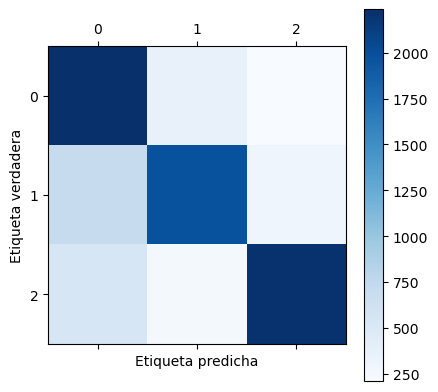

In [20]:
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.show()

In [21]:
accuracy = accuracy_score(yValidacionOneHot, y_pred)
print(accuracy)

0.6959836158834908
